### **1. Importing Libraries**
In this article we will import Pandas, Numpy, Matplotlib, Seaborn and TensorFlow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import os


### 2. Loading the Dataset

In [14]:
df=pd.read_csv('all_stocks_5yr.csv')
df.sample(7)

,date,open,high,low,close,volume,Name
86468,2015-12-08,353.40,354.9399,346.56,348.94,758722,BLK
244369,2014-07-10,23.76,24.0800,23.76,24.03,2348605,GGP
612992,2014-02-03,33.36,33.5200,32.63,32.80,3086580,XYL
18597,2016-12-15,61.32,62.1400,61.03,62.11,2290723,AEP
499251,2017-06-21,60.00,60.3100,59.71,59.96,6027647,SBUX
81404,2016-12-29,39.46,39.7700,39.23,39.41,1243351,BEN
67462,2016-08-17,75.63,77.0400,74.76,76.96,1686994,AWK


In [15]:
df.shape

(619040, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [17]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


### **3. Exploratory Data Analysis**
Exploratory Data Analysis is a technique that is used to analyze the data through visualization and manipulation. For this project let us visualize the data of famous companies such as Nvidia, Google, Apple, Facebook and so on. First let us consider a few companies and visualize the distribution of open and closed Stock prices through 5 years.

In [18]:
# change type od date column ans split in to seperate year,months and day
df['date']=df['date'].astype('datetime64[ns]')
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df.sample(7)

,date,open,high,low,close,volume,Name,year,month,day
396069,2016-06-03,376.17,376.170,372.02,374.10,217809,MTD,2016,6,3
167175,2016-04-08,28.39,28.430,27.90,28.17,2893902,DISCA,2016,4,8
136768,2017-05-02,103.44,104.105,103.21,104.05,999529,COL,2017,5,2
54095,2013-09-19,89.00,89.110,88.05,88.47,1659421,APA,2013,9,19
569105,2014-07-10,43.08,43.190,42.88,43.10,5242022,USB,2014,7,10
264446,2015-05-20,11.44,11.450,11.33,11.35,5443188,HBAN,2015,5,20
196972,2013-04-26,60.85,60.955,59.50,59.56,4677518,EOG,2013,4,26


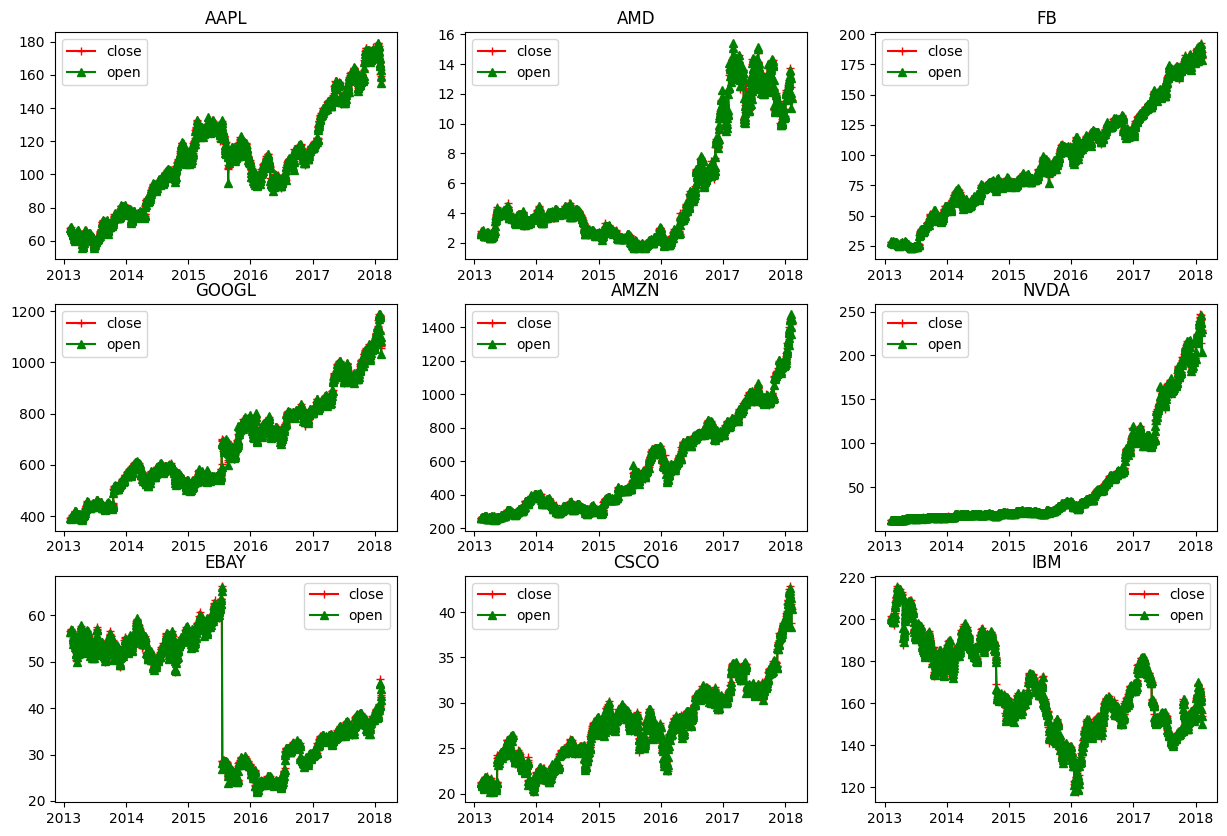

In [19]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize=(15,10))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c=df[df["Name"]==company]
    plt.plot(c['date'], c['close'],c='r',label='close',marker='+')
    plt.plot(c['date'], c['open'],c='g',label='open',marker="^")
    plt.title(company)
    plt.legend()
    plt.plot()


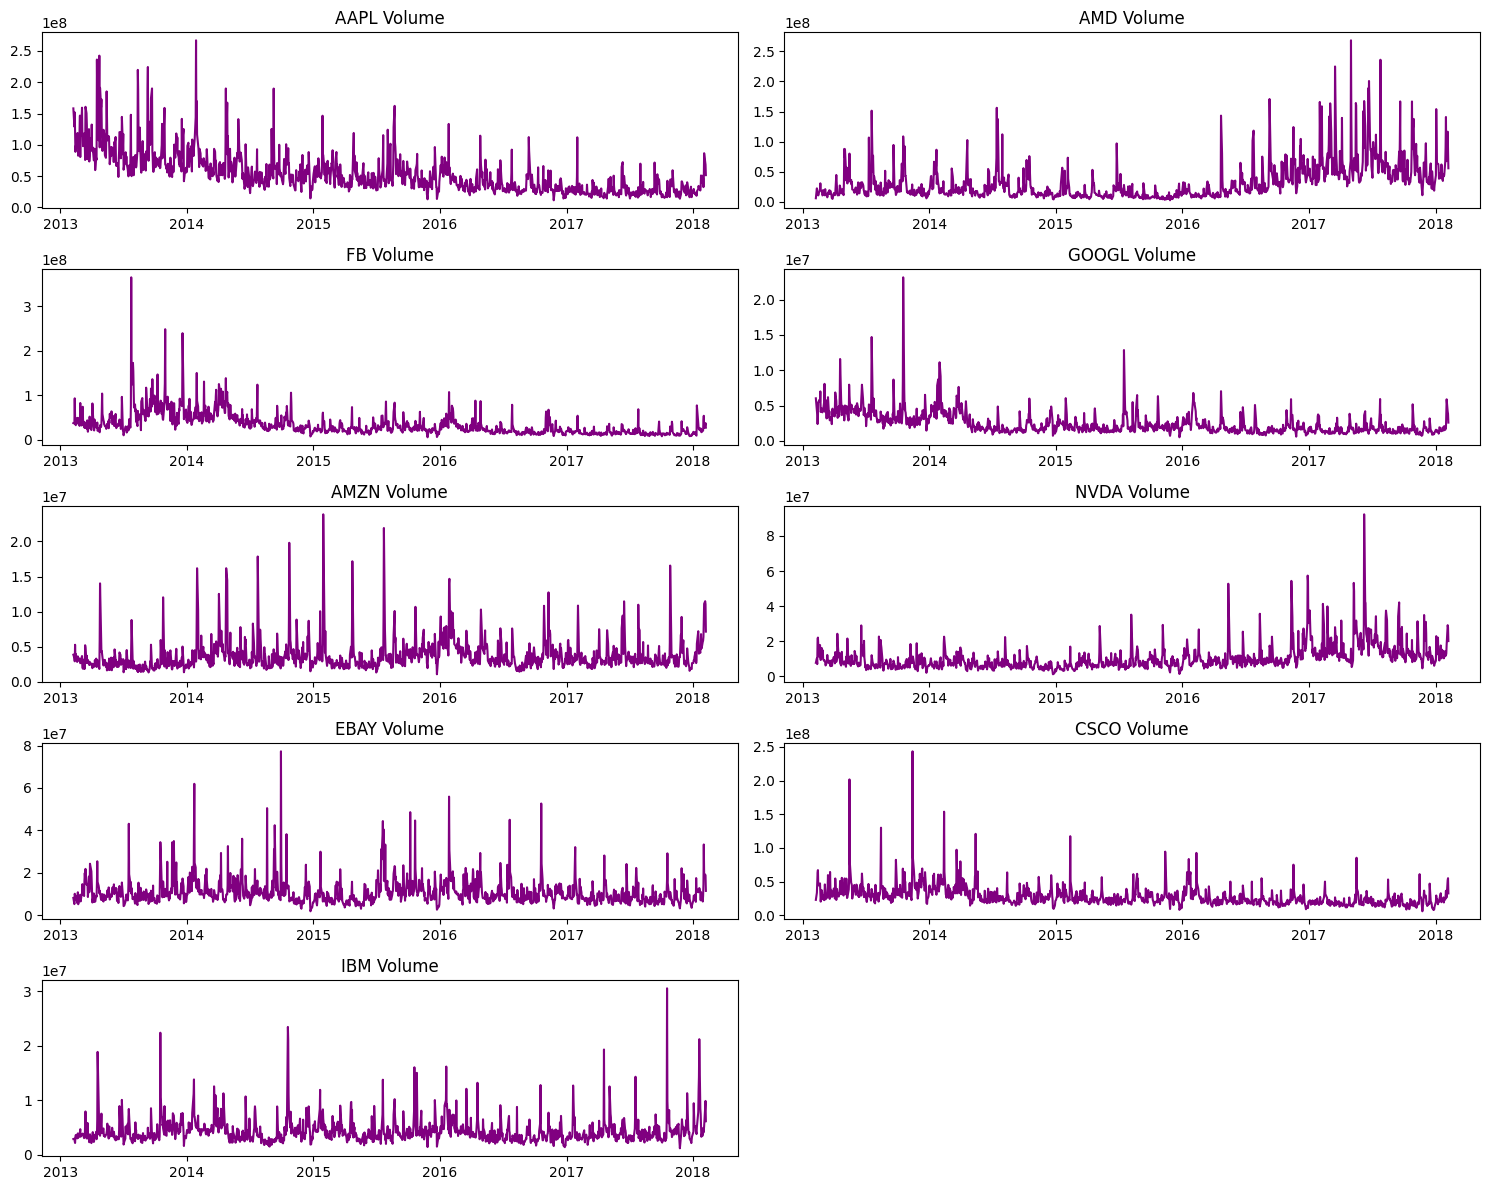

In [20]:
plt.figure(figsize=(15, 12))
for index, company in enumerate(companies, 1):
    plt.subplot(5, 2, index)
    c = df[df['Name'] == company]
    plt.plot(c['date'], c['volume'], c='purple')
    plt.title(f"{company} Volume")
    plt.tight_layout()

Text(0.5, 1.0, 'AAPL Stoke Price')

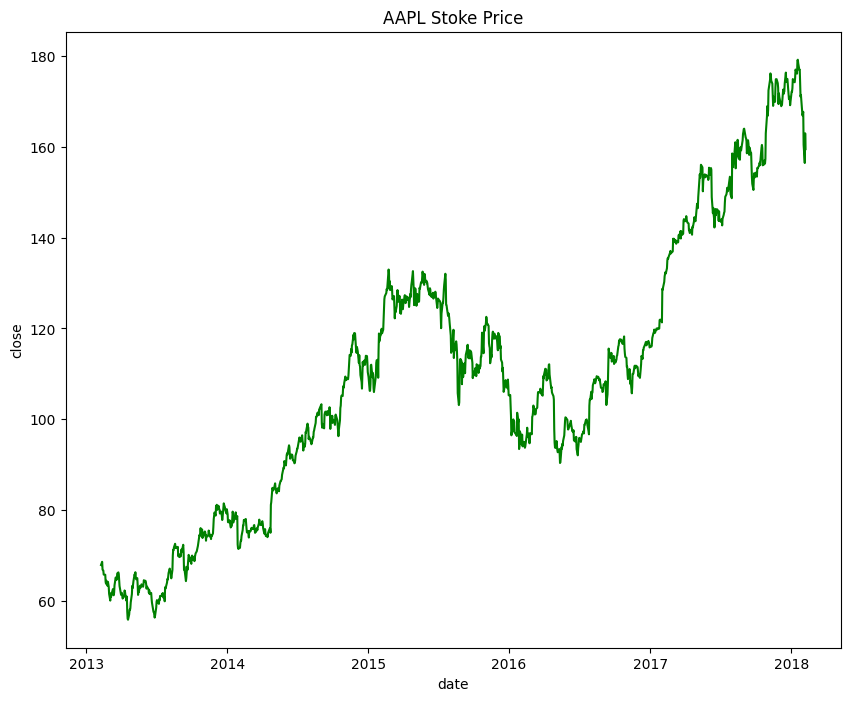

In [25]:
apple=df[df['Name']=='AAPL']
plt.figure(figsize=(10,8))
sns.lineplot(data=apple,x='date',y='close',color='green')
plt.title('AAPL Stoke Price')

Now let's select a subset of the whole data as the training data so that we will be left with a subset of the data for the validation part as well.

In [15]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


Now we have the training data length, next applying scaling and preparing features and labels that are x_train and y_train.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### **4. Build LSTM network using TensorFlow**
Using TensorFlow, we can easily create LSTM models. It is used in Recurrent Neural Networks for sequence models and time series data. It is used to avoid the vanishing gradient issue which is widely occurred in training RNN. To stack multiple LSTM in TensorFlow it is mandatory to use return_sequences = True. Since our data is time series varying we apply no activation to the output layer and it remains as 1 node.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

model = Sequential()
model.add(LSTM(units=64,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

### **5. Model Compilation and Training**
While compiling a model we provide these three essential parameters:

optimizer – This is the method that helps to optimize the cost function by using gradient descent.
loss – The loss function by which we monitor whether the model is improving with training or not.
metrics – This helps to evaluate the model by predicting the training and the validation data.

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0495
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0084
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0085
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0080
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0070
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064


For predicting we require testing data, so we first create the testing data and then proceed with the model prediction.

In [20]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions - y_test) ** 2))
rmse = np.sqrt(mse)

print("MSE", mse)
print("RMSE", np.sqrt(mse))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
MSE 40.037451423780084
RMSE 6.32751542264261


Now that we have predicted the testing data, let us visualize the final results.

/tmp/ipython-input-3073288355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


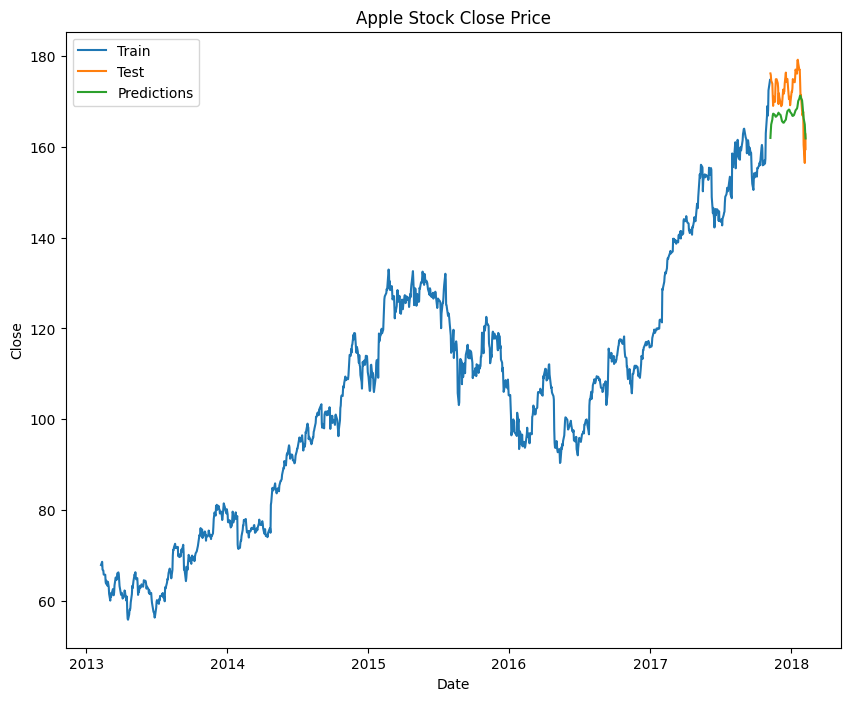

In [21]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])